<a href="https://colab.research.google.com/github/vard-uhi/statistics-with-python-tasks/blob/main/Multivariate_Analyses_with_NHANES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#load the data
from google.colab import files
data_to_load = files.upload()

Saving nhanes_2015_2016.csv to nhanes_2015_2016.csv


In [3]:
import io
# .read_csv() assigns the information from the initial *.csv file to this variable
raw_data = pd.read_csv(io.BytesIO(data_to_load['nhanes_2015_2016.csv']))

In [4]:
df = raw_data.copy()

In [5]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

Text(0.5, 1.0, 'First and Second Measurements of Diastolic Blood Pressure')

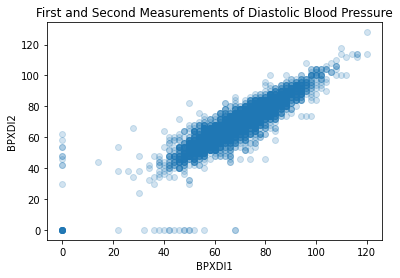

In [6]:
sns.regplot(x = 'BPXDI1', y = 'BPXDI2', data = df, fit_reg = False, scatter_kws={"alpha": 0.2})
plt.title("First and Second Measurements of Diastolic Blood Pressure")

In [7]:
cor_df = pd.DataFrame(df,columns=['BPXSY1','BPXSY2','BPXDI1', "BPXDI2"])

In [8]:
corrMatrix = cor_df.corr()

In [9]:
corrMatrix

,BPXSY1,BPXSY2,BPXDI1,BPXDI2
BPXSY1,1.000000,0.962287,0.316531,0.277681
BPXSY2,0.962287,1.000000,0.329843,0.303847
BPXDI1,0.316531,0.329843,1.000000,0.884722
BPXDI2,0.277681,0.303847,0.884722,1.000000


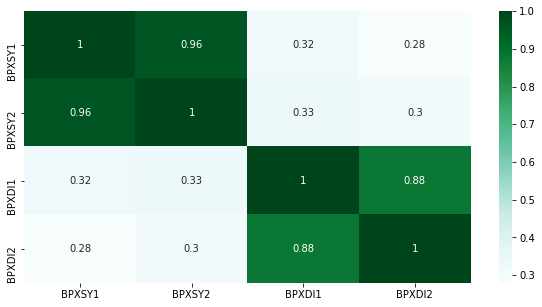

In [31]:
#Let's visualize correlations
plt.figure(figsize=(10,5))
sns.heatmap(cor_df.corr().abs().round(2),annot=True, cmap = "BuGn")
plt.show()

__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

Correlation between the repeated measurements of systolic blood pressure is 0.96 which means that the relationship between the variables is very strong. For repeated measurements of the diastolic blood pressure is 0.88, which to compare with systolic is not that high but considers a strong relationship.

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

They have almost the same correlation, which is not strong.

## Question 2

Log transform the four blood pressure variables and repeat question 1.

In [12]:
#transforming to log value
log_BPXSY1 = np.log(df['BPXSY1'])

In [24]:
type(log_BPXSY1)

pandas.core.series.Series

In [13]:
log_BPXDI1 = np.log(df['BPXDI1'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
log_BPXSY2 = np.log(df['BPXSY2'])

In [15]:
log_BPXDI2 = np.log(df['BPXDI2'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [34]:
frame = {'log_BPXSY1': log_BPXSY1, 'log_BPXSY2': log_BPXSY2, 'log_BPXDI1': log_BPXDI1, 'log_BPXDI2': log_BPXDI2 } 

In [35]:
log_corr = pd.DataFrame(frame) 

In [36]:
log_corr.head()

,log_BPXSY1,log_BPXSY2,log_BPXDI1,log_BPXDI2
0,4.852030,4.820282,4.248495,4.158883
1,4.983607,4.941642,4.477337,4.477337
2,4.927254,4.882802,3.828641,3.784190
3,4.882802,4.897840,4.276666,4.219508
4,4.605170,4.736198,4.248495,3.988984


Text(0.5, 1.0, 'Log of the First and Second Measurements of Diastolic Blood Pressure')

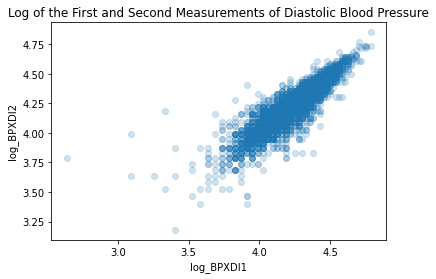

In [37]:
sns.regplot(x = 'log_BPXDI1', y = 'log_BPXDI2', data = log_corr, fit_reg = False, scatter_kws={"alpha": 0.2})
plt.title("Log of the First and Second Measurements of Diastolic Blood Pressure")

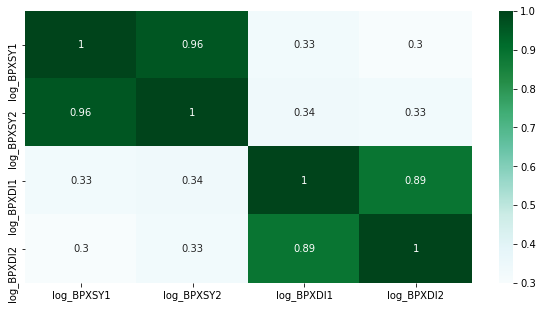

In [38]:
#Let's visualize correlations
plt.figure(figsize=(10,5))
sns.heatmap(log_corr.corr().abs().round(2),annot=True, cmap = "BuGn")
plt.show()

In [39]:
log_corrMatrix = log_corr.corr()

In [40]:
log_corrMatrix

,log_BPXSY1,log_BPXSY2,log_BPXDI1,log_BPXDI2
log_BPXSY1,1.000000,0.958549,0.330588,0.304323
log_BPXSY2,0.958549,1.000000,0.339144,0.329064
log_BPXDI1,0.330588,0.339144,1.000000,0.888256
log_BPXDI2,0.304323,0.329064,0.888256,1.000000


__Q2a.__ Does the correlation analysis on log tranformed data lead to any important insights that the correlation analysis on the untransformed data missed?

Usually we transform data to get linearity between variables, which leads to improvement in the relationship between them. In our case, from scatter plot we clearly can see linearity in non transformed data. In my opinion that is why we didn't see correlation differences after transformation. After transformation we get rid of outliers.

## Question 3

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

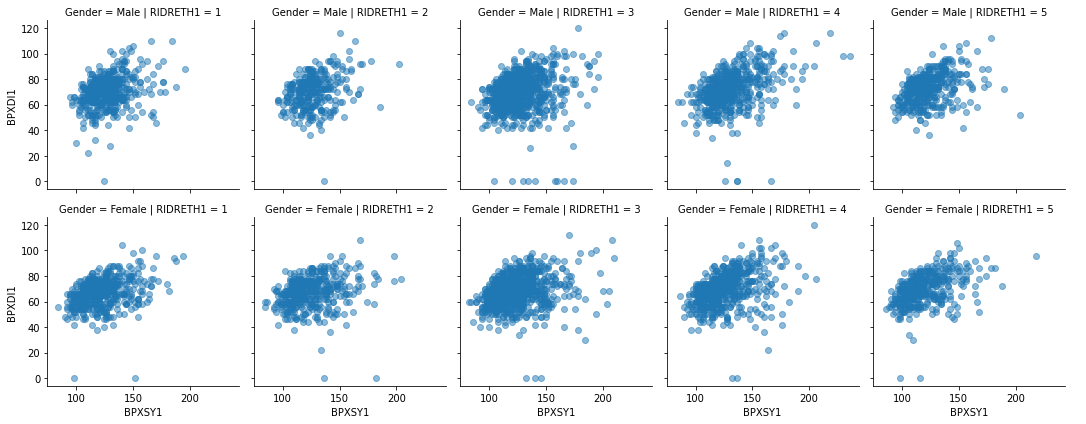

In [41]:
df["Gender"] = df["RIAGENDR"].map({1: "Male", 2: "Female"}) 
first_systolic_dystolic = sns.FacetGrid(df, col="RIDRETH1",  row="Gender").map(plt.scatter, "BPXSY1", "BPXDI1", alpha=0.5).add_legend()

__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

We can indicate that the realtionship between the systolic blood pressure and the diastolic blood pressure is somewhat similar among all ethnic groups and gender.

## Question 4

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

In [42]:
df["Edu"] = df.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
df["Marital_Status"] = df.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Ages within Groups Defined by Gender and Educational Attainment')

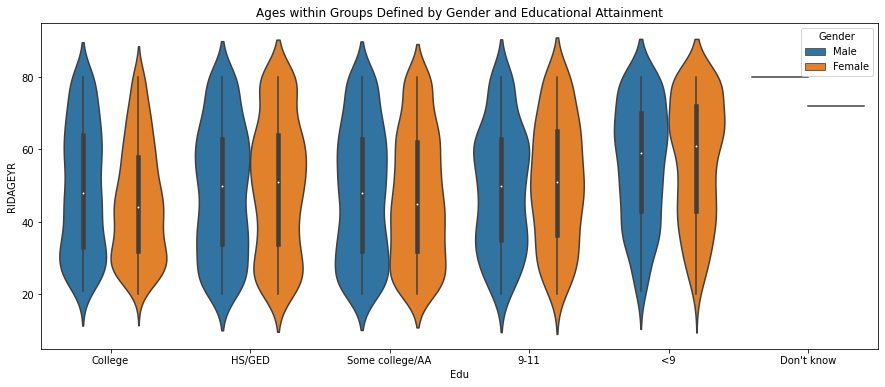

In [45]:
plt.figure(figsize = (15,6))
violin_plots = sns.violinplot(df.Edu, df.RIDAGEYR, df.Gender)
plt.title("Ages within Groups Defined by Gender and Educational Attainment")

__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

From violin plot we can indicate skewness of our categories. We can clearly say that the "College" category is right skewed to contrast with "less than 9th" which is left skewed. Other categories are more symmetric.

## Question 5

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

In [46]:
df["RIDAGEYR"].describe()

count    5735.000000
mean       48.052310
std        18.431011
min        18.000000
25%        32.000000
50%        48.000000
75%        63.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

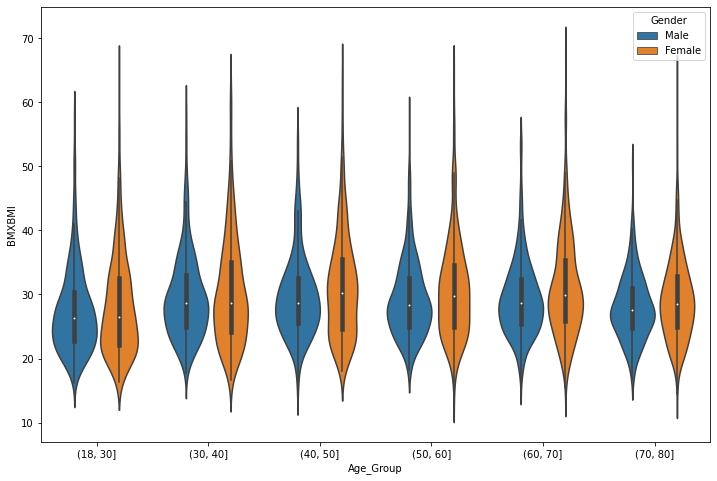

In [47]:
df["Age_Group"] = pd.cut(df.RIDAGEYR, [18,30,40,50,60,70,80])
plt.figure(figsize = (12,8))
BMI_by_age_gender = sns.violinplot(x = df.Age_Group, y = df.BMXBMI, hue = df.Gender)

__Q5a.__ Comment on the trends in BMI across the demographic groups.

The BMI for Male respondents are more symmetrical among age groups. To contrast with Female, which in low ages is right skewed and at the end it becomes more symmetrical.

## Question 6

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [48]:
df["Ethnicity"] = df.RIDRETH1.replace({1: "Mexican American", 2: "Other Hispanic", 3: "Non-Hispanic White", 
                                      4: "Non-Hispanic Black", 5: "Other Race - Including Multi-Racial"})

In [49]:
df["Health_Insurance"] = df.HIQ210.replace({1: "Yes", 2: "No", 7: "Refused", 9: "Don't Know"})

In [51]:
pd.isnull(df['Ethnicity']).sum()

0

In [52]:
pd.isnull(df['Health_Insurance']).sum()

1003

In [53]:
df["Health_Insurance"].fillna("Missing", inplace = True)

In [54]:
Freq_Table = pd.crosstab(df.Ethnicity, df.Health_Insurance)

In [55]:
Freq_Table.apply(lambda z: 100*z/z.sum(), axis = 1)

Health_Insurance,Don't Know,Missing,No,Yes
Ethnicity,,,,
Mexican American,0.294695,33.791749,56.777996,9.135560
Non-Hispanic Black,0.081500,15.240424,75.468623,9.209454
Non-Hispanic White,0.108755,10.386079,83.469277,6.035889
Other Hispanic,0.000000,23.333333,66.800000,9.866667
Other Race - Including Multi-Racial,0.221976,11.764706,80.799112,7.214206


__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

83% of Non-hispanic whites answered 'NO' to compare with others. We can conclude that Non-hispanic whites has the highest rate of being uninsured.
